Import Libraries

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K


Load the Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)


11490434/11490434 [==============================] - 5s 0us/step
(60000, 28, 28) (60000,)


Reshape the Data

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


Convert Labels to Categorical

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


Normalize the Data

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


Print Shapes

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


CNN Model: 1. Set Hyperparameters

In [ ]:
batch_size = 128
num_classes = 10
epochs = 30


Build the Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


Compile the Model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.dadelta(),
              metrics=['accuracy'])


Train the Model

In [ ]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("The model has successfully trained")


Epoch 1/30
469/469 [==============================] - 40s 79ms/step - loss: 2.3043 - accuracy: 0.1192 - val_loss: 2.2896 - val_accuracy: 0.1783
Epoch 2/30
469/469 [==============================] - 35s 74ms/step - loss: 2.2876 - accuracy: 0.1410 - val_loss: 2.2719 - val_accuracy: 0.2161
Epoch 3/30
469/469 [==============================] - 35s 75ms/step - loss: 2.2718 - accuracy: 0.1622 - val_loss: 2.2545 - val_accuracy: 0.2390
Epoch 4/30
469/469 [==============================] - 35s 75ms/step - loss: 2.2558 - accuracy: 0.1841 - val_loss: 2.2364 - val_accuracy: 0.2546
Epoch 5/30
469/469 [==============================] - 35s 75ms/step - loss: 2.2410 - accuracy: 0.1987 - val_loss: 2.2170 - val_accuracy: 0.2759
Epoch 6/30
469/469 [==============================] - 36s 76ms/step - loss: 2.2252 - accuracy: 0.2148 - val_loss: 2.1962 - val_accuracy: 0.3073
Epoch 7/30
469/469 [==============================] - 35s 74ms/step - loss: 2.2069 - accuracy: 0.2337 - val_loss: 2.1733 - val_accuracy:

Evaluate the Model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1896922588348389
Test accuracy: 0.7529000043869019


In [ ]:
score = model.evaluate(x_test, y_test, verbose=1, sample_weight=None )
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

313/313 [==============================] - 4s 13ms/step - loss: 1.1897 - accuracy: 0.7529
Test loss: 1.1896922588348389
Test accuracy: 75.29000043869019


Prediction

In [ ]:
# user to enter the index of the image to predict
image_index = int(input("Enter the index of the image to predict (0-9999): "))

Enter the index of the image to predict (0-9999): 4


In [ ]:
# Get the image from the test set
img = x_test[image_index]

In [ ]:
# Reshape the image to match the input_shape of the model
img_reshaped = img.reshape(1, 28, 28, 1)

In [ ]:
# Predict the class
prediction = model.predict(img_reshaped)

1/1 [==============================] - 0s 65ms/step


In [ ]:
# Get the index of the highest probability
predicted_class = np.argmax(prediction)

Plot the digit

In [ ]:
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 7.2/7.2 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 103.2/103.2 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.3 MB/s eta 0:00:00


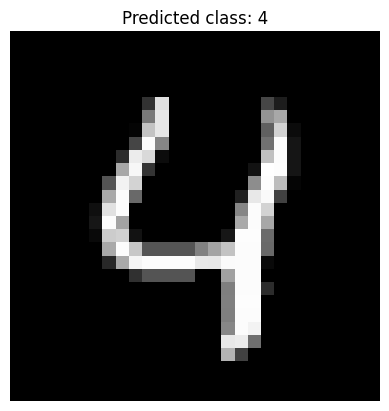

In [ ]:
import matplotlib.pyplot as plt
# Display the image and predicted class
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Predicted class: {predicted_class}')
plt.axis('off')
plt.show()